In [10]:
%matplotlib inline
import json
import skimage
import scipy
import scipy.ndimage
from mpl_toolkits.mplot3d import Axes3D
import cv2
import time
import random
import copy
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import re
import glob
import sys
import os

In [11]:
IMG_DIR= "./results/"
def read_image(IMG_NAME, gray = False):
    g = 0 if gray else 1
    img = cv2.imread(IMG_DIR + IMG_NAME)
    # to convert to RGB
    if g:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

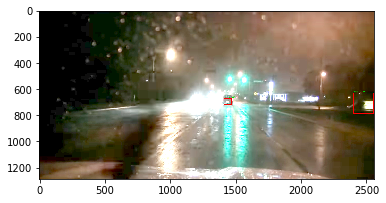

In [100]:
im_pre = "boxed_image_processed_"
im_suf = ".png"

re_pre = "result_processed_"
re_suf = ".txt"

num_list = [0, 2, 6, 7, 11, 12, 13, 16, 17, 20, 22, 24, 25]

inum = 0
snum = str(num_list[inum])
snum = str(22)

im1 = read_image(im_pre + snum + im_suf)
plt.imshow(im1)

obj_str = ""
with open(IMG_DIR + re_pre + snum + re_suf, 'r') as f:
    for line in f:
        obj_str = line.strip('"')

In [101]:
jobj = json.loads(obj_str.replace('\'', '\"'))
for i in jobj:
    print(i)

{'bottomright': {'y': 720, 'x': 1470}, 'topleft': {'y': 674, 'x': 1412}, 'confidence': 0.34471908, 'label': 'car'}
{'bottomright': {'y': 789, 'x': 2554}, 'topleft': {'y': 630, 'x': 2403}, 'confidence': 0.38719767, 'label': 'car'}


In [102]:
xdim = im1.shape[1]
ydim = im1.shape[0]

# compute centers of squares
best_box = -1
min_dist = float('inf')
for ind, i in enumerate(jobj):
    if i['label'] == 'car' or i['label'] == 'truck':
        diff = abs(.6 * xdim - (i['topleft']['x'] + i['bottomright']['x']) / 2)
        if diff < min_dist:
            min_dist = diff
            best_box = ind

print(best_box)

0


In [103]:
im1 = read_image(im_pre + snum + im_suf)

True

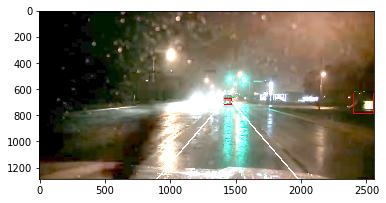

In [104]:
x_l = jobj[best_box]['topleft']['x']
y_l = jobj[best_box]['topleft']['y']

x_r = jobj[best_box]['bottomright']['x']
y_r = jobj[best_box]['bottomright']['y']

l_start = (x_l, y_l / 2)
r_start = (x_r, y_r / 2)

h, w, _ = im1.shape

low_draw = (y_r - y_l) // 2 + y_l
xoff = int(.2 * w)

cv2.line(im1, (x_l - xoff, h), (x_l, low_draw), (255, 255, 255), 10)
cv2.line(im1, (x_r + xoff, h), (x_r, low_draw), (255, 255, 255), 10)
plt.imshow(im1)

imsave = cv2.cvtColor(im1, cv2.COLOR_RGB2BGR)
cv2.imwrite("out_processed_" + snum + ".png", imsave)